# COMPUTER VISION

## Convolutional Classifier

Create your first computer vision model with Keras
Have you ever wanted to teach a computer to see? In this course, that's exactly what you'll do!

In this course, you'll:

Use modern deep-learning networks to build an image classifier with Keras
Design your own custom convnet with reusable blocks
Learn the fundamental ideas behind visual feature extraction
Master the art of transfer learning to boost your models
Utilize data augmentation to extend your dataset
If you've taken the Introduction to Deep Learning course, you'll know everything you need to be successful.


### Introduction
This course will introduce you to the fundamental ideas of computer vision. Our goal is to learn how a neural network can "understand" a natural image well-enough to solve the same kinds of problems the human visual system can solve.

The neural networks that are best at this task are called convolutional neural networks (Sometimes we say convnet or CNN instead.) Convolution is the mathematical operation that gives the layers of a convnet their unique structure. In future lessons, you'll learn why this structure is so effective at solving computer vision problems.

We will apply these ideas to the problem of image classification: given a picture, can we train a computer to tell us what it's a picture of? You may have seen apps that can identify a species of plant from a photograph. That's an image classifier! In this course, you'll learn how to build image classifiers just as powerful as those used in professional applications.

While our focus will be on image classification, what you'll learn in this course is relevant to every kind of computer vision problem. At the end, you'll be ready to move on to more advanced applications like generative adversarial networks and image segmentation.

The Convolutional Classifier
A convnet used for image classification consists of two parts: 
a) convolutional base and
a) dense head.
This is visually represented below:
https://storage.googleapis.com/kaggle-media/learn/images/U0n5xjU.png

The base is used to extract the features from an image. It is formed primarily of layers performing the convolution operation, but often includes other kinds of layers as well. (You'll learn about these in the next lesson.)

The head is used to determine the class of the image. It is formed primarily of dense layers, but might include other layers like dropout.

What do we mean by visual feature? A feature could be a line, a color, a texture, a shape, a pattern -- or some complicated combination.

The whole process goes something like this:

Visual representation in the image in the image below:
https://storage.googleapis.com/kaggle-media/learn/images/UUAafkn.png



### Training the Classifier
The goal of the network during training is to learn two things:

which features to extract from an image (base),
which class goes with what features (head).
These days, convnets are rarely trained from scratch. More often, we reuse the base of a pretrained model. To the pretrained base we then attach an untrained head. In other words, we reuse the part of a network that has already learned to do 1. Extract features, and attach to it some fresh layers to learn 2. Classify.

https://storage.googleapis.com/kaggle-media/learn/images/E49fsmV.png

Because the head usually consists of only a few dense layers, very accurate classifiers can be created from relatively little data.

Reusing a pretrained model is a technique known as transfer learning. It is so effective, that almost every image classifier these days will make use of it.

Example - Train a Convnet Classifier
Throughout this course, we're going to be creating classifiers that attempt to solve the following problem: is this a picture of a Car or of a Truck? Our dataset is about 10,000 pictures of various automobiles, around half cars and half trucks.

Step 1 - Load Data
This next hidden cell will import some libraries and set up our data pipeline. We have a training split called ds_train and a validation split called ds_valid.

In [8]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    './train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    './valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)


Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


Step 2 - Define Pretrained Base¶
The most commonly used dataset for pretraining is ImageNet, a large dataset of many kind of natural images. Keras includes a variety models pretrained on ImageNet in its applications module. The pretrained model we'll use is called VGG16

In [10]:
pretrained_base = tf.keras.models.load_model(
    './vgg16-pretrained-base',
)
pretrained_base.trainable = False

Step 3 - Attach Head
Next, we attach the classifier head. For this example, we'll use a layer of hidden units (the first Dense layer) followed by a layer to transform the outputs to a probability score for class 1, Truck. The Flatten layer transforms the two dimensional outputs of the base into the one dimensional inputs needed by the head

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [39]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=2, #should be 30 but I am running on CPU so I could do only one.
    verbose=1,
)

Epoch 1/2
80/80 [==============================] - 127s 1s/step - loss: 0.6185 - binary_accuracy: 0.5863 - val_loss: 0.5939 - val_binary_accuracy: 0.7084
Epoch 2/2
80/80 [==============================] - 110s 1s/step - loss: 0.5703 - binary_accuracy: 0.7323 - val_loss: 0.5651 - val_binary_accuracy: 0.7341


Step 4 - Train
Finally, let's train the model. Since this is a two-class problem, we'll use the binary versions of crossentropy and accuracy. The adam optimizer generally performs well, so we'll choose it as well.

When training a neural network, it's always a good idea to examine the loss and metric plots. The history object contains this information in a dictionary history.history. We can use Pandas to convert this dictionary to a dataframe and plot it with a built-in method.


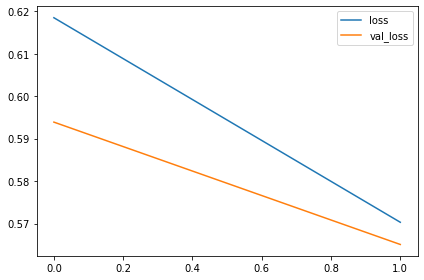

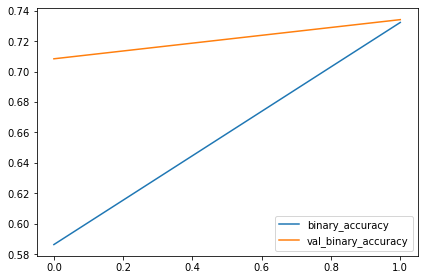

In [40]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();


In this lesson, we learned about the structure of a convnet classifier: a head to act as a classifier atop of a base which performs the feature extraction.

The head, essentially, is an ordinary classifier like you learned about in the introductory course. For features, it uses those features extracted by the base. This is the basic idea behind convolutional classifiers: that we can attach a unit that performs feature engineering to the classifier itself.

This is one of the big advantages deep neural networks have over traditional machine learning models: given the right network structure, the deep neural net can learn how to engineer the features it needs to solve its problem.

For the next few lessons, we'll take a look at how the convolutional base accomplishes the feature extraction. Then, you'll learn how to apply these ideas and design some classifiers of your own.



# CONVOLUTION AND RELU

Discover how convnets create features with convolutional layers.

In [13]:
import numpy as np
from itertools import product

def show_kernel(kernel, label=True, digits=None, text_size=28):
    # Format kernel
    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits)

    # Plot kernel
    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap=cmap)
    rows, cols = kernel.shape
    thresh = (kernel.max()+kernel.min())/2
    # Optionally, add value labels
    if label:
        for i, j in product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val, 
                     color=color, size=text_size,
                     horizontalalignment='center', verticalalignment='center')
    plt.xticks([])
    plt.yticks([])

In the last lesson, we saw that a convolutional classifier has two parts: a convolutional base and a head of dense layers. We learned that the job of the base is to extract visual features from an image, which the head would then use to classify the image.

Over the next few lessons, we're going to learn about the two most important types of layers that you'll usually find in the base of a convolutional image classifier. These are the convolutional layer with ReLU activation, and the maximum pooling layer. In Lesson 5, you'll learn how to design your own convnet by composing these layers into blocks that perform the feature extraction.

This lesson is about the convolutional layer with its ReLU activation function.



### Feature Extraction
Before we get into the details of convolution, let's discuss the purpose of these layers in the network. We're going to see how these three operations (convolution, ReLU, and maximum pooling) are used to implement the feature extraction process.

The feature extraction performed by the base consists of three basic operations:

Filter an image for a particular feature (convolution)
Detect that feature within the filtered image (ReLU)
Condense the image to enhance the features (maximum pooling)
The next figure illustrates this process. You can see how these three operations are able to isolate some particular characteristic of the original image (in this case, horizontal lines).
Visually represented in the image from the link below:

https://storage.googleapis.com/kaggle-media/learn/images/IYO9lqp.png

Typically, the network will perform several extractions in parallel on a single image. In modern convnets, it's not uncommon for the final layer in the base to be producing over 1000 unique visual features.

Filter with Convolution
A convolutional layer carries out the filtering step. You might define a convolutional layer in a Keras model something like this:

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64,kernel_size=3)
])

We can understand these parameters by looking at their relationship to the weights and activations of the layer. Let's do that now.

Weights
The weights a convnet learns during training are primarily contained in its convolutional layers. These weights we call kernels. We can represent them as small arrays:
https://storage.googleapis.com/kaggle-media/learn/images/uJfD9r9.png

A kernel operates by scanning over an image and producing a weighted sum of pixel values. In this way, a kernel will act sort of like a polarized lens, emphasizing or deemphasizing certain patterns of information.
https://storage.googleapis.com/kaggle-media/learn/images/j3lk26U.png





Kernels define how a convolutional layer is connected to the layer that follows. The kernel above will connect each neuron in the output to nine neurons in the input. By setting the dimensions of the kernels with kernel_size, you are telling the convnet how to form these connections. Most often, a kernel will have odd-numbered dimensions -- like kernel_size=(3, 3) or (5, 5) -- so that a single pixel sits at the center, but this is not a requirement.

The kernels in a convolutional layer determine what kinds of features it creates. During training, a convnet tries to learn what features it needs to solve the classification problem. This means finding the best values for its kernels.



Activations
The activations in the network we call feature maps. They are what result when we apply a filter to an image; they contain the visual features the kernel extracts. Here are a few kernels pictured with feature maps they produced.

https://storage.googleapis.com/kaggle-media/learn/images/JxBwchH.png

From the pattern of numbers in the kernel, you can tell the kinds of feature maps it creates. Generally, what a convolution accentuates in its inputs will match the shape of the positive numbers in the kernel. The left and middle kernels above will both filter for horizontal shapes.

With the filters parameter, you tell the convolutional layer how many feature maps you want it to create as output.



Detect with ReLU
After filtering, the feature maps pass through the activation function. The rectifier function has a graph like this:
https://storage.googleapis.com/kaggle-media/learn/images/DxGJuTH.png

The graph of the rectifier function looks like a line with the negative part "rectified" to 0.
A neuron with a rectifier attached is called a rectified linear unit. For that reason, we might also call the rectifier function the ReLU activation or even the ReLU function.

The ReLU activation can be defined in its own Activation layer, but most often you'll just include it as the activation function of Conv2D.



In [16]:
model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu')
    # More layers follow
])

You could think about the activation function as scoring pixel values according to some measure of importance. The ReLU activation says that negative values are not important and so sets them to 0. ("Everything unimportant is equally unimportant.")

Here is ReLU applied the feature maps above. Notice how it succeeds at isolating the features.
Notice how the activation performed in the image in the link below:
https://storage.googleapis.com/kaggle-media/learn/images/dKtwzPY.png

Like other activation functions, the ReLU function is nonlinear. Essentially this means that the total effect of all the layers in the network becomes different than what you would get by just adding the effects together -- which would be the same as what you could achieve with only a single layer. The nonlinearity ensures features will combine in interesting ways as they move deeper into the network. (We'll explore this "feature compounding" more in Lesson 5.)



Example - Apply Convolution and ReLU
We'll do the extraction ourselves in this example to understand better what convolutional networks are doing "behind the scenes".

Here is the image we'll use for this example:

https://www.kaggleusercontent.com/kf/126572661/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..q2DGW4_UEXi1L9le1jr5lw.jtXIyIJC2QQHebD1vJm5bFUv7bl9G1iEy-z_Gyh6oQwRC3iFk6tbF-iQ7IpY3dYsciIp-5ZLA8YiFKWPBw2cHCG_bmvEVZ32HrSoCsbkeMnJUncFPh8tZ2T1eCtqzNdUwqhw0RktSHjisI-fNMCge3byh5OkSy9fdUWqt8DxNndl8LyP3TFXXs0C-swzLwX_ISrDdAB4v9NOUUTQZvePzTik2csjDPXOpgTJIIFpPUKExVMre2jL2wcgUzNZqKh_mo5pVSIjVqJiCjHhDjf7uAxjlqGuv8goTjMr5N2obtW0yA-nr-LzvKTyFxDq9kwl8Iz_T5u2jzmSdkmhtogyq161kGSVZbjWnSssHhUldie7YGg5B5Cra_gHf0iFqX07pdbtQkoNEIi4-ogYR9PLrqvYM1Xd5HeUl_6-NOhnDTnu0vk6ZZ6aaAB27pYt8AjhOjq4qGczgorkYiQCNofW1dwxK4np081QRIizFSMizyDQ7BarYkD24Hixd24_SFePZkmRNoSc-I5r14usGGMlHnCEktZSO0Ct0tHgxkgeCD3fO77wRDA4KGwFPZ1GXbJ6pNSewzhpsZZj5Dz4u4JgaxxmDQ-m9b7TkwTqHKbyEQF5gSSgMGsMWsfCpoDuzk8r2EIOzdYdKNx7LQt1aGii_0_7UNkTK-yS9mx2yACwbAg.BmxBRIAWJ-EX7Sr9nYd9tQ/__results___files/__results___7_0.png

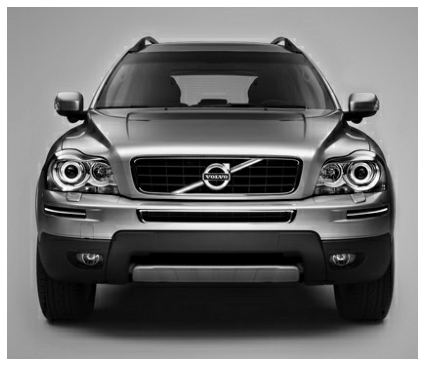

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = './car_feature.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show();

For the filtering step, we'll define a kernel and then apply it with the convolution. The kernel in this case is an "edge detection" kernel. You can define it with tf.constant just like you'd define an array in Numpy with np.array. This creates a tensor of the sort TensorFlow uses.

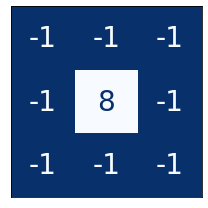

In [18]:
import tensorflow as tf

kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])

plt.figure(figsize=(3, 3))
show_kernel(kernel)

TensorFlow includes many common operations performed by neural networks in its tf.nn module. The two that we'll use are conv2d and relu. These are simply function versions of Keras layers.

This next hidden cell does some reformatting to make things compatible with TensorFlow. The details aren't important for this example

In [19]:
# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

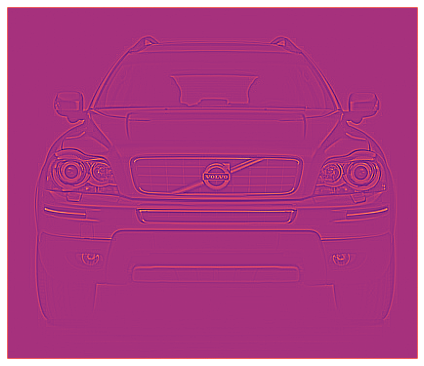

In [20]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    # we'll talk about these two in lesson 4!
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show();

Next is the detection step with the ReLU function. This function is much simpler than the convolution, as it doesn't have any parameters to set.

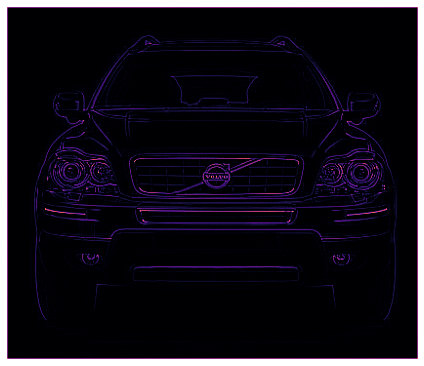

In [21]:
image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();

And now we've created a feature map! Images like these are what the head uses to solve its classification problem. We can imagine that certain features might be more characteristic of Cars and others more characteristic of Trucks. The task of a convnet during training is to create kernels that can find those features.



Conclusion
We saw in this lesson the first two steps a convnet uses to perform feature extraction: filter with Conv2D layers and detect with relu activation.

# MAXIMUM POOLING

Introduction
In Lesson 2 we began our discussion of how the base in a convnet performs feature extraction. We learned about how the first two operations in this process occur in a Conv2D layer with relu activation.

In this lesson, we'll look at the third (and final) operation in this sequence: condense with maximum pooling, which in Keras is done by a MaxPool2D layer.

Condense with Maximum Pooling¶
Adding condensing step to the model we had before, will give us this:

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3), # activation is None
    layers.MaxPool2D(pool_size=2),
    # More layers follow
])

A MaxPool2D layer is much like a Conv2D layer, except that it uses a simple maximum function instead of a kernel, with the pool_size parameter analogous to kernel_size. A MaxPool2D layer doesn't have any trainable weights like a convolutional layer does in its kernel, however.

Let's take another look at the extraction figure from the last lesson. Remember that MaxPool2D is the Condense step.
https://storage.googleapis.com/kaggle-media/learn/images/IYO9lqp.png

Notice that after applying the ReLU function (Detect) the feature map ends up with a lot of "dead space," that is, large areas containing only 0's (the black areas in the image). Having to carry these 0 activations through the entire network would increase the size of the model without adding much useful information. Instead, we would like to condense the feature map to retain only the most useful part -- the feature itself.

This in fact is what maximum pooling does. Max pooling takes a patch of activations in the original feature map and replaces them with the maximum activation in that patch.
https://storage.googleapis.com/kaggle-media/learn/images/hK5U2cd.png

When applied after the ReLU activation, it has the effect of "intensifying" features. The pooling step increases the proportion of active pixels to zero pixels.



Example - Apply Maximum Pooling
Let's add the "condense" step to the feature extraction we did in the example in Lesson 2. This next hidden cell will take us back to where we left off.

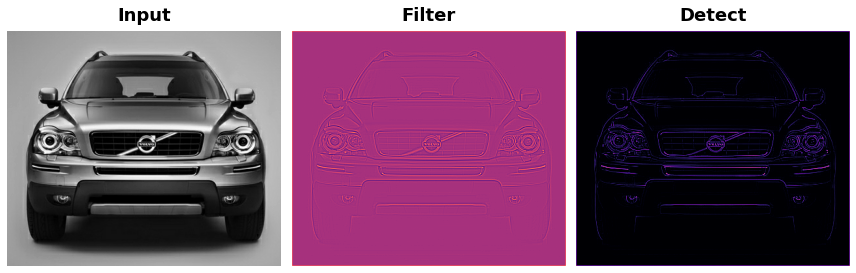

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

# Read image
image_path = './car_feature.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

# Define kernel
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
], dtype=tf.float32)

# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])

# Filter step
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    # we'll talk about these two in the next lesson!
    strides=1,
    padding='SAME'
)

# Detect step
image_detect = tf.nn.relu(image_filter)

# Show what we have so far
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.title('Input')
plt.subplot(132)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Filter')
plt.subplot(133)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Detect')
plt.show();

We'll use another one of the functions in tf.nn to apply the pooling step, tf.nn.pool. This is a Python function that does the same thing as the MaxPool2D layer you use when model building, but, being a simple function, is easier to use directly.

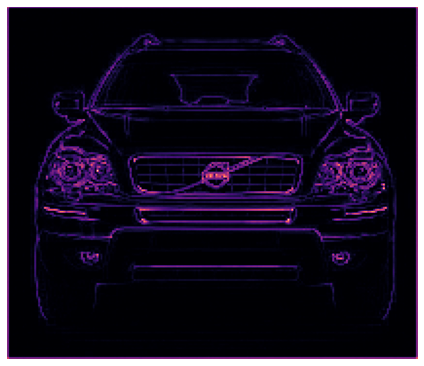

In [24]:
import tensorflow as tf

image_condense = tf.nn.pool(
    input=image_detect, # image in the Detect step above
    window_shape=(2, 2),
    pooling_type='MAX',
    # we'll see what these do in the next lesson!
    strides=(2, 2),
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.show();

Pretty cool! Hopefully you can see how the pooling step was able to intensify the feature by condensing the image around the most active pixels.



Translation Invariance
We called the zero-pixels "unimportant". Does this mean they carry no information at all? In fact, the zero-pixels carry positional information. The blank space still positions the feature within the image. When MaxPool2D removes some of these pixels, it removes some of the positional information in the feature map. This gives a convnet a property called translation invariance. This means that a convnet with maximum pooling will tend not to distinguish features by their location in the image. ("Translation" is the mathematical word for changing the position of something without rotating it or changing its shape or size.)

Watch what happens when we repeatedly apply maximum pooling to the following feature map.


https://storage.googleapis.com/kaggle-media/learn/images/97j8WA1.png

The two dots in the original image became indistinguishable after repeated pooling. In other words, pooling destroyed some of their positional information. Since the network can no longer distinguish between them in the feature maps, it can't distinguish them in the original image either: it has become invariant to that difference in position.

In fact, pooling only creates translation invariance in a network over small distances, as with the two dots in the image. Features that begin far apart will remain distinct after pooling; only some of the positional information was lost, but not all of it.

https://storage.googleapis.com/kaggle-media/learn/images/kUMWdcP.png



This invariance to small differences in the positions of features is a nice property for an image classifier to have. Just because of differences in perspective or framing, the same kind of feature might be positioned in various parts of the original image, but we would still like for the classifier to recognize that they are the same. Because this invariance is built into the network, we can get away with using much less data for training: we no longer have to teach it to ignore that difference. This gives convolutional networks a big efficiency advantage over a network with only dense layers. (You'll see another way to get invariance for free in Lesson 6 with Data Augmentation!)

In this lesson, we learned the about the last step of feature extraction: condense with MaxPool2D. In Lesson 4, we'll finish up our discussion of convolution and pooling with sliding windows.


# SLIDING WINDOW
Explore two important parameters: stride and padding.

Introduction
In the previous two lessons, we learned about the three operations that carry out feature extraction from an image:

filter with a convolution layer
detect with ReLU activation
condense with a maximum pooling layer
The convolution and pooling operations share a common feature: they are both performed over a sliding window. With convolution, this "window" is given by the dimensions of the kernel, the parameter kernel_size. With pooling, it is the pooling window, given by pool_size.
Visit the link below to have a feel of how this occurs:
https://storage.googleapis.com/kaggle-media/learn/images/LueNK6b.gif

There are two additional parameters affecting both convolution and pooling layers -- these are the strides of the window and whether to use padding at the image edges. The strides parameter says how far the window should move at each step, and the padding parameter describes how we handle the pixels at the edges of the input.

With these two parameters, defining the two layers becomes:

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64,
                  kernel_size=3,
                  strides=1,
                  padding='same',
                  activation='relu'),
    layers.MaxPool2D(pool_size=2,
                     strides=1,
                     padding='same')
    # More layers follow
])

Stride
The distance the window moves at each step is called the stride. We need to specify the stride in both dimensions of the image: one for moving left to right and one for moving top to bottom. This animation shows strides=(2, 2), a movement of 2 pixels each step.
https://storage.googleapis.com/kaggle-media/learn/images/Tlptsvt.gif


What effect does the stride have? Whenever the stride in either direction is greater than 1, the sliding window will skip over some of the pixels in the input at each step.

Because we want high-quality features to use for classification, convolutional layers will most often have strides=(1, 1). Increasing the stride means that we miss out on potentially valuable information in our summary. Maximum pooling layers, however, will almost always have stride values greater than 1, like (2, 2) or (3, 3), but not larger than the window itself.

Finally, note that when the value of the strides is the same number in both directions, you only need to set that number; for instance, instead of strides=(2, 2), you could use strides=2 for the parameter setting.



Padding
When performing the sliding window computation, there is a question as to what to do at the boundaries of the input. Staying entirely inside the input image means the window will never sit squarely over these boundary pixels like it does for every other pixel in the input. Since we aren't treating all the pixels exactly the same, could there be a problem?

What the convolution does with these boundary values is determined by its padding parameter. In TensorFlow, you have two choices: either padding='same' or padding='valid'. There are trade-offs with each.

When we set padding='valid', the convolution window will stay entirely inside the input. The drawback is that the output shrinks (loses pixels), and shrinks more for larger kernels. This will limit the number of layers the network can contain, especially when inputs are small in size.

The alternative is to use padding='same'. The trick here is to pad the input with 0's around its borders, using just enough 0's to make the size of the output the same as the size of the input. This can have the effect however of diluting the influence of pixels at the borders. The animation below shows a sliding window with 'same' padding.

https://storage.googleapis.com/kaggle-media/learn/images/RvGM2xb.gif
The VGG model we've been looking at uses same padding for all of its convolutional layers. Most modern convnets will use some combination of the two. (Another parameter to tune!)



Example - Exploring Sliding Windows
To better understand the effect of the sliding window parameters, it can help to observe a feature extraction on a low-resolution image so that we can see the individual pixels. Let's just look at a simple circle.

This next hidden cell will create an image and kernel for us.

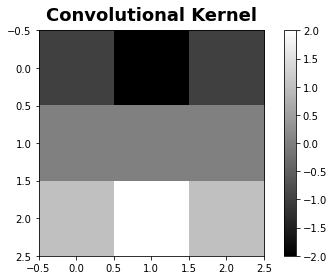

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Define the circle function
def circle(shape, val=1.0, r_shrink=3):
    center = (shape[0] // 2, shape[1] // 2)
    y, x = np.ogrid[:shape[0], :shape[1]]
    distance = np.sqrt((x - center[1]) ** 2 + (y - center[0]) ** 2)
    circle_mask = (distance <= shape[0] / r_shrink).astype(float)
    return circle_mask * val

# Define the show_kernel function
def show_kernel(kernel):
    plt.imshow(kernel, cmap='gray', interpolation='none')
    plt.title("Convolutional Kernel")
    plt.colorbar()
    plt.show()

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image = circle([64, 64], val=1.0, r_shrink=3)
image = tf.reshape(image, [*image.shape, 1])
# Bottom sobel
kernel = tf.constant(
    [[-1, -2, -1],
     [0, 0, 0],
     [1, 2, 1]],
)

show_kernel(kernel)


In [32]:
#the next steps have been discontinued, On tho the next lesson

# CUSTOM COVNETS

## Introduction
Now that you've seen the layers a convnet uses to extract features, it's time to put them together and build a network of your own!

### Simple to Refined
In the last three lessons, we saw how convolutional networks perform feature extraction through three operations: filter, detect, and condense. A single round of feature extraction can only extract relatively simple features from an image, things like simple lines or contrasts. These are too simple to solve most classification problems. Instead, convnets will repeat this extraction over and over, so that the features become more complex and refined as they travel deeper into the network.

Visualize an example:
https://storage.googleapis.com/kaggle-media/learn/images/VqmC1rm.png

Convolutional Blocks
It does this by passing them through long chains of convolutional blocks which perform this extraction.

https://storage.googleapis.com/kaggle-media/learn/images/pr8VwCZ.png

These convolutional blocks are stacks of Conv2D and MaxPool2D layers, whose role in feature extraction we learned about in the last few lessons.
https://storage.googleapis.com/kaggle-media/learn/images/8D6IhEw.png
Each block represents a round of extraction, and by composing these blocks the convnet can combine and recombine the features produced, growing them and shaping them to better fit the problem at hand. The deep structure of modern convnets is what allows this sophisticated feature engineering and has been largely responsible for their superior performance.




Example - Design a Convnet
Let's see how to define a deep convolutional network capable of engineering complex features. In this example, we'll create a Keras Sequence model and then train it on our Cars dataset.



In [34]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    './train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    './valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [35]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([

    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=6, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 128)      

Notice in this definition is how the number of filters doubled block-by-block: 32, 64, 128. This is a common pattern. Since the MaxPool2D layer is reducing the size of the feature maps, we can afford to increase the quantity we create.



Step 3 - Train
We can train this model just like the model from Lesson 1: compile it with an optimizer along with a loss and metric appropriate for binary classification.

In [41]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=2,  #should be 40 but my machine can only run 1 on CPU
    verbose=1,
)

Epoch 1/2
80/80 [==============================] - 110s 1s/step - loss: 0.5304 - binary_accuracy: 0.7600 - val_loss: 0.5572 - val_binary_accuracy: 0.7432
Epoch 2/2
80/80 [==============================] - 109s 1s/step - loss: 0.5214 - binary_accuracy: 0.7700 - val_loss: 0.5489 - val_binary_accuracy: 0.7472


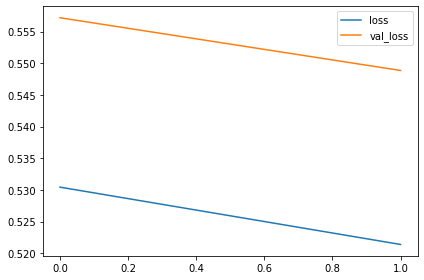

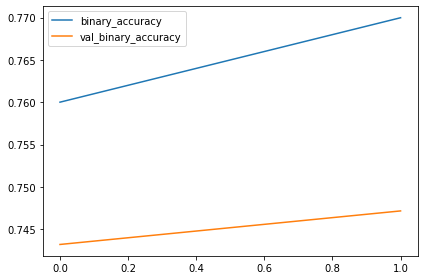

In [42]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

This model is much smaller than the VGG16 model from Lesson 1 -- only 3 convolutional layers versus the 16 of VGG16. It was nevertheless able to fit this dataset fairly well. We might still be able to improve this simple model by adding more convolutional layers, hoping to create features better adapted to the dataset. This is what we'll try in the exercises.



# DATA AUGMENTATION

Introduction
Now that you've learned the fundamentals of convolutional classifiers, you're ready to move on to more advanced topics.

In this lesson, you'll learn a trick that can give a boost to your image classifiers: it's called data augmentation.

The Usefulness of Fake Data
The best way to improve the performance of a machine learning model is to train it on more data. The more examples the model has to learn from, the better it will be able to recognize which differences in images matter and which do not. More data helps the model to generalize better.

One easy way of getting more data is to use the data you already have. If we can transform the images in our dataset in ways that preserve the class, we can teach our classifier to ignore those kinds of transformations. For instance, whether a car is facing left or right in a photo doesn't change the fact that it is a Car and not a Truck. So, if we augment our training data with flipped images, our classifier will learn that "left or right" is a difference it should ignore.

And that's the whole idea behind data augmentation: add in some extra fake data that looks reasonably like the real data and your classifier will improve.



Using Data Augmentation
Typically, many kinds of transformation are used when augmenting a dataset. These might include rotating the image, adjusting the color or contrast, warping the image, or many other things, usually applied in combination. Here is a sample of the different ways a single image might be transformed.

https://storage.googleapis.com/kaggle-media/learn/images/UaOm0ms.png

Data augmentation is usually done online, meaning, as the images are being fed into the network for training. Recall that training is usually done on mini-batches of data. This is what a batch of 16 images might look like when data augmentation is used.

https://storage.googleapis.com/kaggle-media/learn/images/MFviYoE.png

Each time an image is used during training, a new random transformation is applied. This way, the model is always seeing something a little different than what it's seen before. This extra variance in the training data is what helps the model on new data.

It's important to remember though that not every transformation will be useful on a given problem. Most importantly, whatever transformations you use should not mix up the classes. If you were training a digit recognizer, for instance, rotating images would mix up '9's and '6's. In the end, the best approach for finding good augmentations is the same as with most ML problems: try it and see!





Example - Training with Data Augmentation
Keras lets you augment your data in two ways. The first way is to include it in the data pipeline with a function like ImageDataGenerator. The second way is to include it in the model definition by using Keras's preprocessing layers. This is the approach that we'll take. The primary advantage for us is that the image transformations will be computed on the GPU instead of the CPU, potentially speeding up training.

In this exercise, we'll learn how to improve the classifier from Lesson 1 through data augmentation. This next hidden cell sets up the data pipeline.

In [43]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    #os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    './train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    './valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)


Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


Step 2 - Define Model
To illustrate the effect of augmentation, we'll just add a couple of simple transformations to the model from Tutorial 1.

In [44]:
from tensorflow import keras
from tensorflow.keras import layers
# these are a new feature in TF 2.2
from tensorflow.keras.layers.experimental import preprocessing


pretrained_base = tf.keras.models.load_model(
    './vgg16-pretrained-base',
)
pretrained_base.trainable = False

model = keras.Sequential([
    # Preprocessing
    preprocessing.RandomFlip('horizontal'), # flip left-to-right
    preprocessing.RandomContrast(0.5), # contrast change by up to 50%
    # Base
    pretrained_base,
    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=1,
    verbose=1,
)

80/80 [==============================] - ETA: 0s - loss: 0.6947 - binary_accuracy: 0.5638